### **Summary**

Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

This is an analysis of the music preference of individuals of different ages, and the effect this choice of music has on their mental health.

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(tidyr)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### **Import and View Dataset**

In [2]:
music_mh <- read.csv("/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv")

In [3]:
#View the first 6 rows of the dataset 

head(music_mh)

,Timestamp,Age,Primary.streaming.service,Hours.per.day,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,⋯,Frequency..R.B.,Frequency..Rap.,Frequency..Rock.,Frequency..Video.game.music.,Anxiety,Depression,Insomnia,OCD,Music.effects,Permissions
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,,I understand.
2,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,,I understand.
3,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
4,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
5,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
6,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.


In [4]:
# View the dimension of the data

dim(music_mh)

[1] 736  33

In [5]:
# Check the structure of the dataset

str(music_mh)

'data.frame':	736 obs. of  33 variables:
 $ Timestamp                   : chr  "8/27/2022 19:29:02" "8/27/2022 19:57:31" "8/27/2022 21:28:18" "8/27/2022 21:40:40" ...
 $ Age                         : int  18 63 18 61 18 18 18 21 19 18 ...
 $ Primary.streaming.service   : chr  "Spotify" "Pandora" "Spotify" "YouTube Music" ...
 $ Hours.per.day               : num  3 1.5 4 2.5 4 5 3 1 6 1 ...
 $ While.working               : chr  "Yes" "Yes" "No" "Yes" ...
 $ Instrumentalist             : chr  "Yes" "No" "No" "No" ...
 $ Composer                    : chr  "Yes" "No" "No" "Yes" ...
 $ Fav.genre                   : chr  "Latin" "Rock" "Video game music" "Jazz" ...
 $ Exploratory                 : chr  "Yes" "Yes" "No" "Yes" ...
 $ Foreign.languages           : chr  "Yes" "No" "Yes" "Yes" ...
 $ BPM                         : int  156 119 132 84 107 86 66 95 94 155 ...
 $ Frequency..Classical.       : chr  "Rarely" "Sometimes" "Never" "Sometimes" ...
 $ Frequency..Country.         : chr  "Nev

In [6]:
#View the summary of the dataset

summary(music_mh)

  Timestamp              Age        Primary.streaming.service Hours.per.day   
 Length:736         Min.   :10.00   Length:736                Min.   : 0.000  
 Class :character   1st Qu.:18.00   Class :character          1st Qu.: 2.000  
 Mode  :character   Median :21.00   Mode  :character          Median : 3.000  
                    Mean   :25.21                             Mean   : 3.573  
                    3rd Qu.:28.00                             3rd Qu.: 5.000  
                    Max.   :89.00                             Max.   :24.000  
                    NA's   :1                                                 
 While.working      Instrumentalist      Composer          Fav.genre        
 Length:736         Length:736         Length:736         Length:736        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                            

### **Data Cleaning**

Max. vs Quartile range of Age, Hours.Per.Day and BPM shows the data has outliers.

In [7]:
# Drop rows where age is over 60

music_mh2 <- subset(music_mh, Age <= 60 )

In [8]:
# Drop rows where Hours.per.day is over 15

music_mh3 <- subset(music_mh2, Hours.per.day <= 15 )

In [9]:
# Drop rows where BPM is over 250

music_mh4 <- subset(music_mh3, BPM <= 250 )

Timetsamp is the time the survey was submitted after filling. 

Permissions has one unique value ( I understand )

drop both columns

In [10]:
# Drop columns Timestamp, Permissions

music_mh_v2 = subset(music_mh4, select = -c(Timestamp,Permissions) )

save new data

In [11]:
music_mh_v2 %>%
  write.csv("music_mh_v2")

### **Data Analysis and Visualization**

**View the different streaming platforms and the count of users**

In [12]:
#Create a dataframe for streaming platform

streaming_platform <- music_mh_v2%>%
filter(Primary.streaming.service != "") %>%
group_by(Primary.streaming.service)%>%
summarize(users = n())%>%
arrange(desc(users))

View(streaming_platform)

Primary.streaming.service,users
<chr>,<int>
Spotify,395
YouTube Music,74
I do not use a streaming service.,52
Apple Music,41
Other streaming service,39
Pandora,5


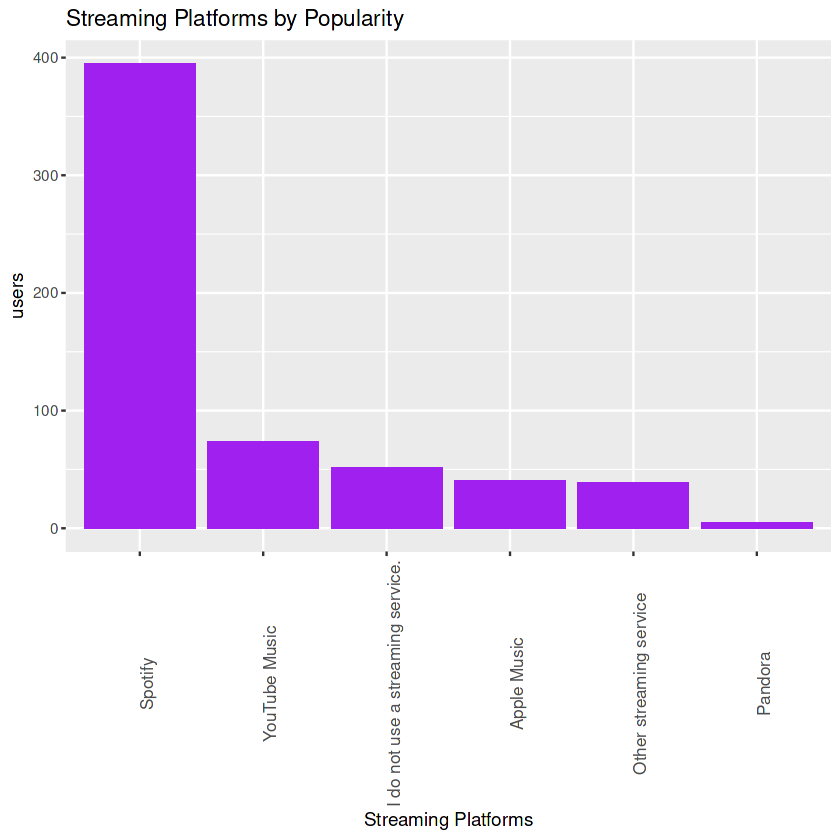

In [13]:
# Visualize streaming_platform

ggplot ((data = streaming_platform), aes(x = reorder(Primary.streaming.service, -users), y = users)) + geom_col(fill = 'purple') + labs(title = "Streaming Platforms by Popularity")+ xlab("Streaming Platforms") + theme(axis.text.x= element_text(size =10, angle = 90))

Spotify is the most popular streaming platform with the highest count of users, while Pandora is the least used streaming platform.

**Check Age distribution of data**

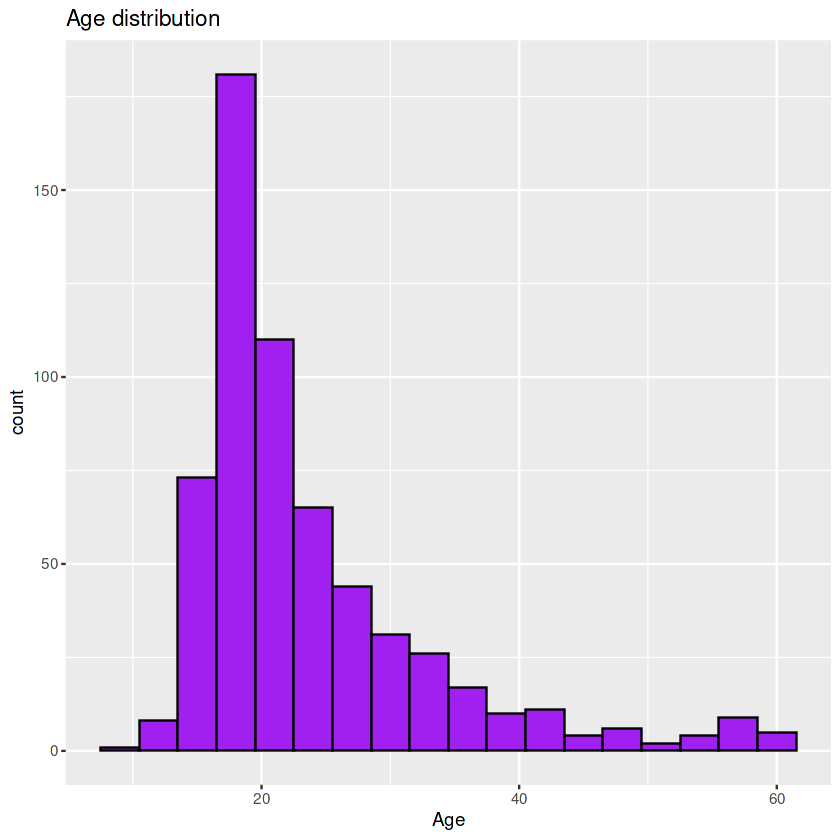

In [14]:
ggplot(music_mh_v2, aes(x = Age)) + geom_histogram(binwidth = 3, fill = "purple", colour = "black") + labs(title = "Age distribution")

Teenagers listen to music more frequently than other age groups.

**Analyze Genre Preference**

In [15]:
Genre <- music_mh_v2%>%
group_by(Fav.genre)%>%
summarize(number = n())%>%
arrange(desc(number))

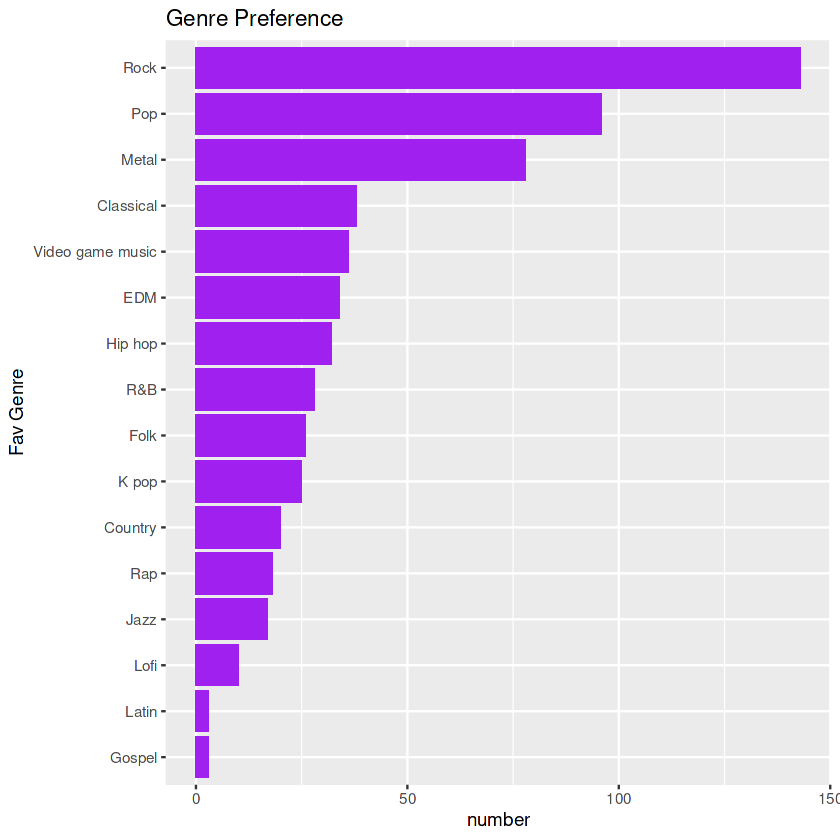

In [16]:
ggplot(Genre, aes(x = number, y = reorder(Fav.genre, number))) + geom_col(fill = 'purple') + labs(title = "Genre Preference") + ylab("Fav Genre")

Rock is the most preferred genre of music, while Gospel and latin are the least preferred music genres

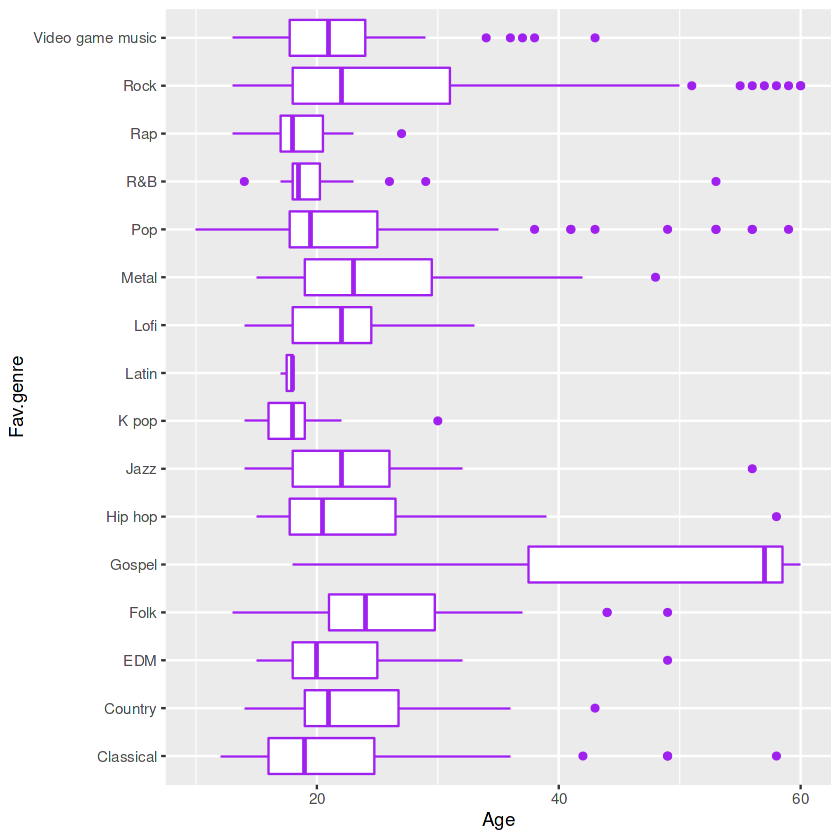

In [17]:
# Check the age distribution of genre preference

ggplot(data = music_mh_v2, aes(x=Age,y=Fav.genre)) + geom_boxplot(colour = "purple")

Rock music preference spans across all age groups, While genres like Rap, R&B, Lof and K Pop are preferred by younger individuals.

**How do individuals listen to music - while working or not**

In [18]:
working <- music_mh_v2 %>%
filter (While.working != "") %>%
group_by (While.working)

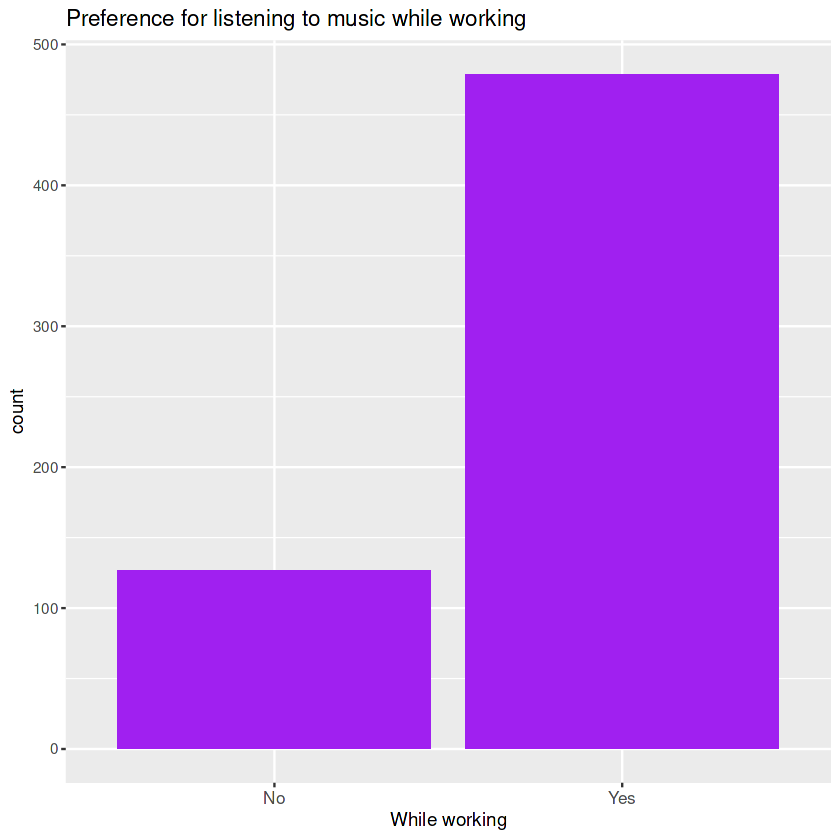

In [19]:
ggplot(data=working, aes(x = While.working)) + geom_bar( fill = 'purple')  + labs(title = "Preference for listening to music while working")+ xlab("While working") + theme(axis.text.x= element_text(size =10))

More people prefer to listen to music while they work.

**Plot Hours of music listened to daily**

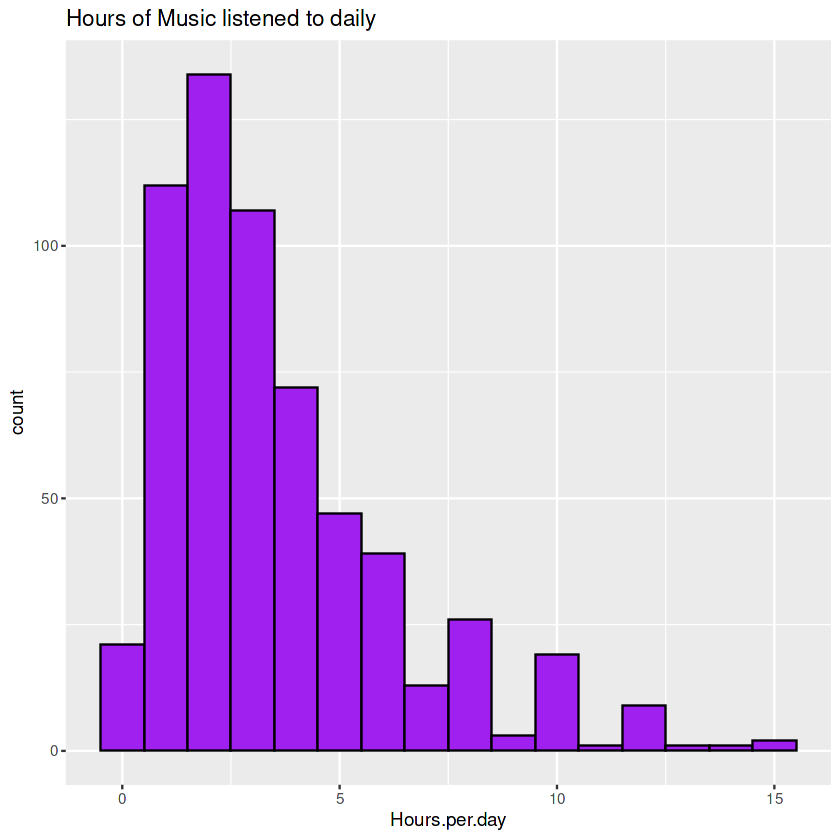

In [20]:
ggplot(music_mh_v2, aes(x = Hours.per.day)) + geom_histogram(binwidth = 1, fill = "purple", colour = "black") + labs(title = "Hours of Music listened to daily")

Most people listen to music for 1 - 3 hours a day.

**Check if any relationship exists between Age and Hours of music listened to daily**

`geom_smooth()` using formula 'y ~ x'



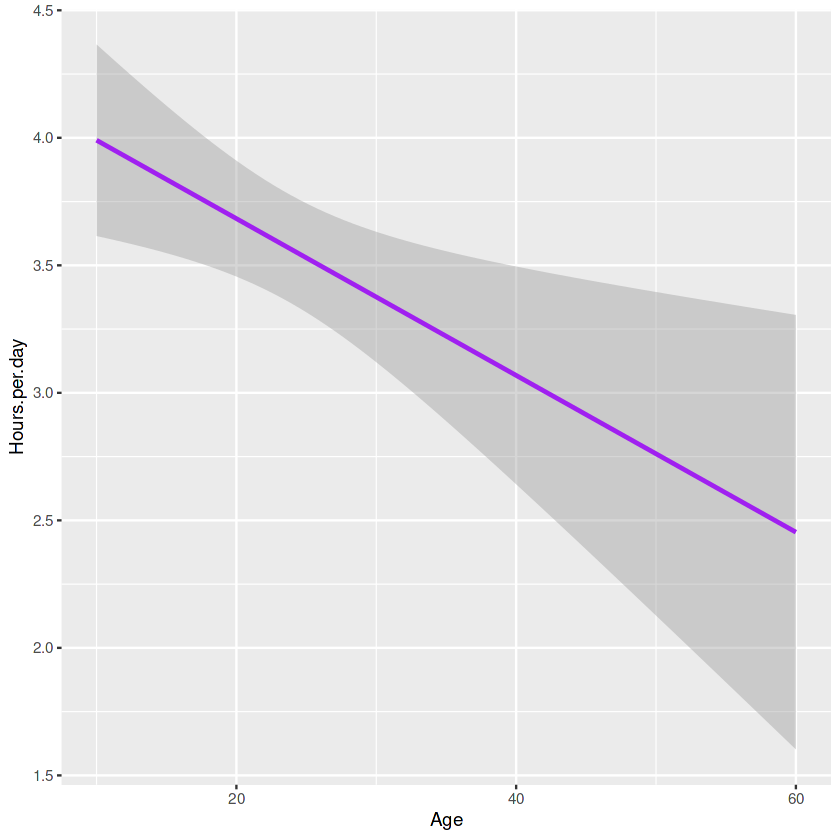

In [21]:
ggplot(data = music_mh_v2, aes( x = Age, y = Hours.per.day)) + geom_smooth (method = 'lm', colour = "purple") 

geom_smooth() was used to identify the general underlying pattern in the data, which shows that hours of music listened to daily tends to decrease as age increases.

**Count the number of Instrumentalists and Composers**

In [22]:
music_mh_v2 %>%
filter (Instrumentalist != "") %>%
count(Instrumentalist) %>%
group_by (Instrumentalist)

Instrumentalist,n
<chr>,<int>
No,402
Yes,202


In [23]:
music_mh_v2 %>%
filter (Composer != "") %>%
count(Composer) %>%
group_by (Composer)

Composer,n
<chr>,<int>
No,502
Yes,105


There are more Instrumentalists than Composers.

**Analyze the various mental conditions**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



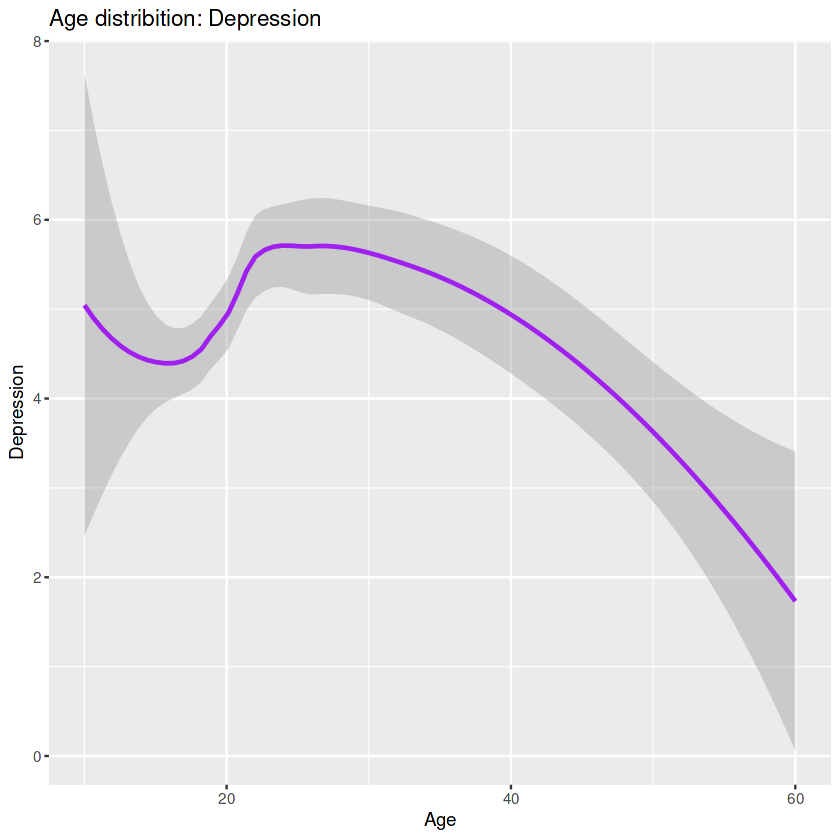

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



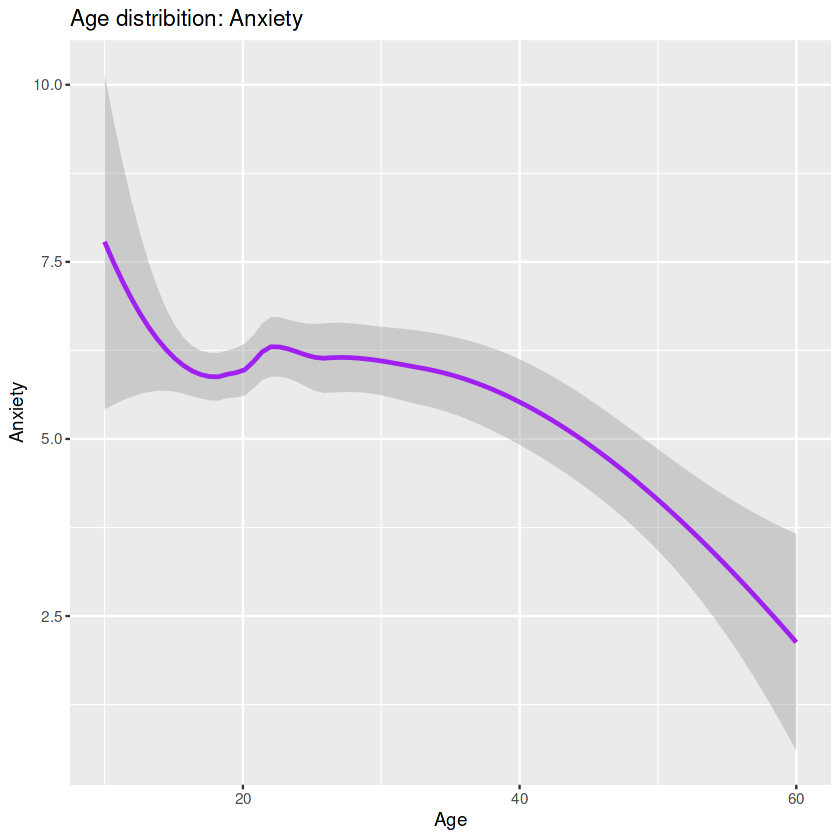

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



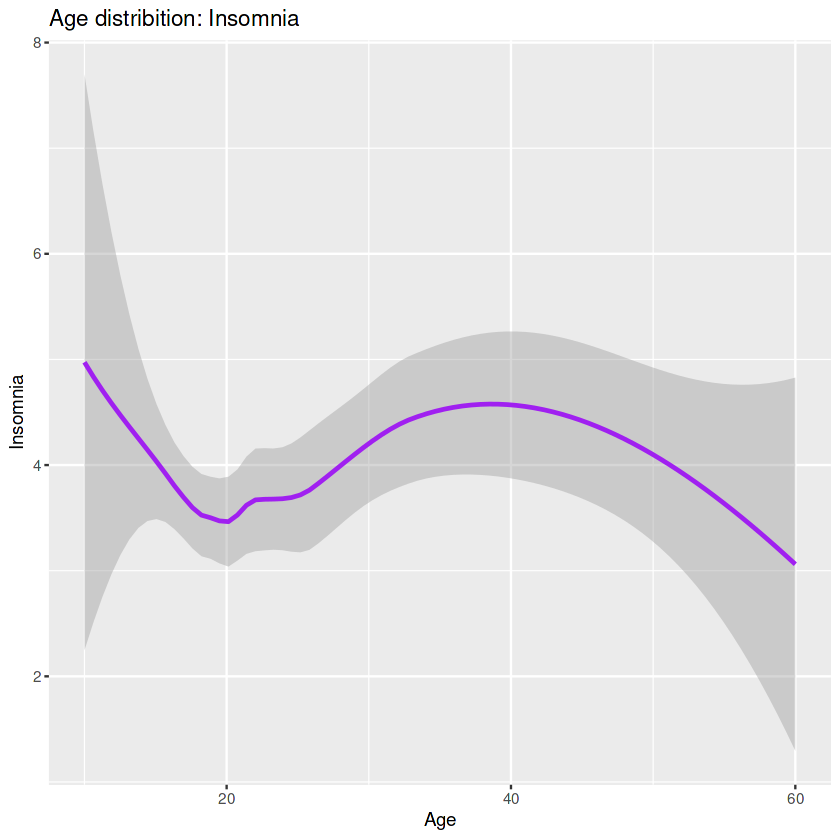

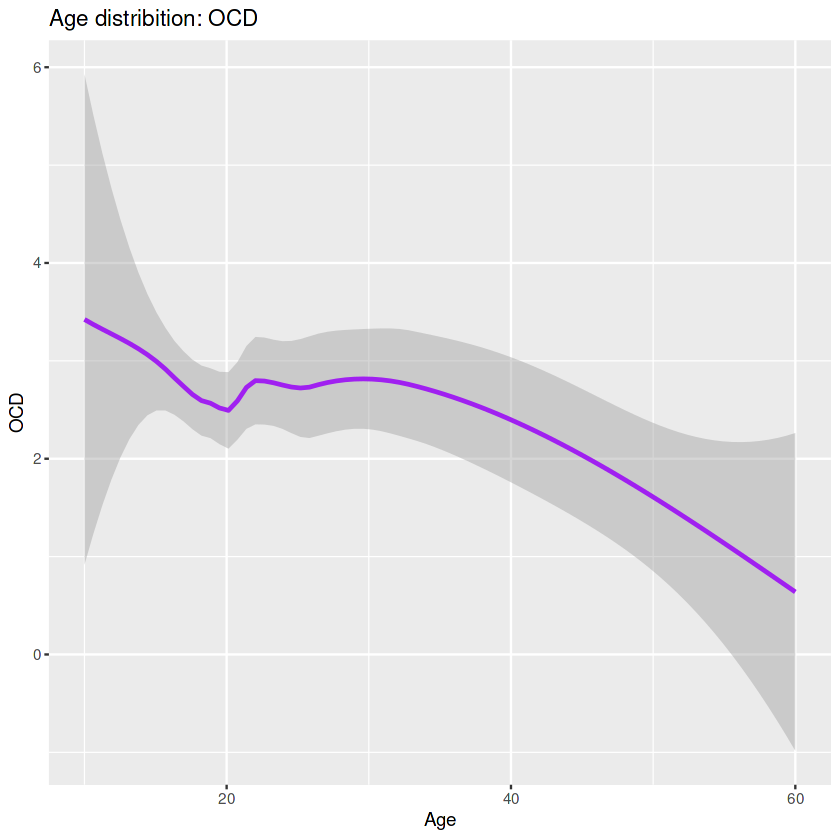

In [24]:
# Check the age distribution of people who experience each mental condition

ggplot(data = music_mh_v2, aes(x = Age, y = Depression)) + geom_smooth(colour = "purple") + labs(title = "Age distribition: Depression")
ggplot(data = music_mh_v2, aes(x = Age, y = Anxiety)) + geom_smooth(colour = "purple") + labs(title = "Age distribition: Anxiety")
ggplot(data = music_mh_v2, aes(x = Age, y = Insomnia)) + geom_smooth(colour = "purple") + labs(title = "Age distribition: Insomnia")
ggplot(data = music_mh_v2, aes(x = Age, y = OCD)) + geom_smooth(colour = "purple") + labs(title = "Age distribition: OCD")

Teenagers experience higher levels of Anxiety, Insomnia and OCD than older people. People in their twenties, however, experience higher levels of Depression than other age groups.

**Analyze the effect of music on mental conditions**

In [25]:
mh <- music_mh_v2 %>%
filter (Music.effects != "") %>%
group_by (Music.effects) %>%
summarize(number =n())

View (mh)

Music.effects,number
<chr>,<int>
Improve,453
No effect,135
Worsen,15


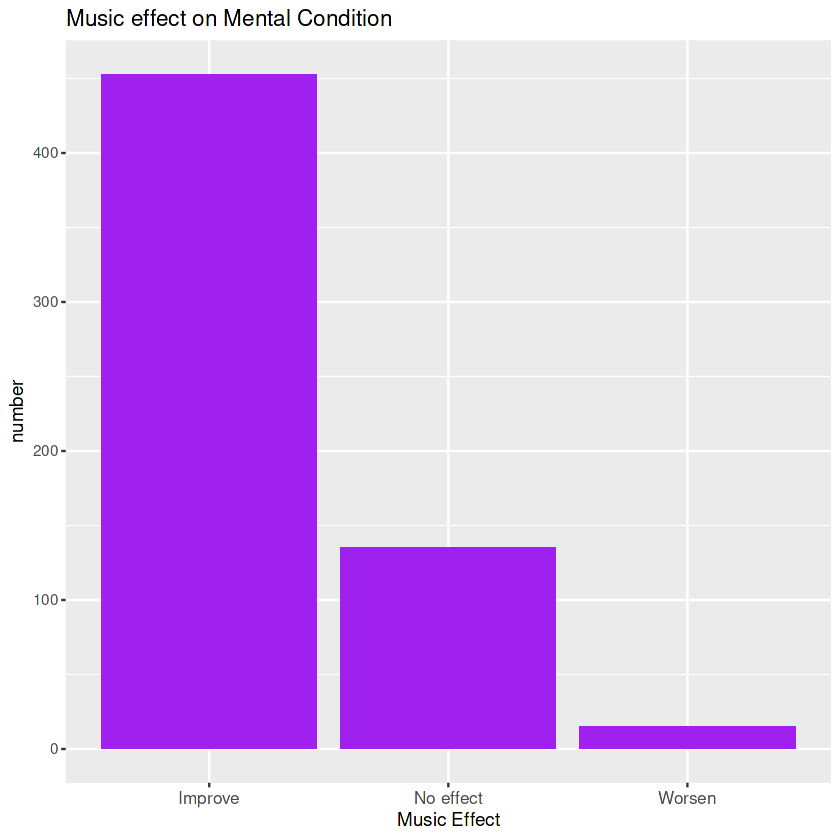

In [26]:
ggplot(mh, aes(x= Music.effects, y = number)) + geom_col(fill = "purple") + labs(title = "Music effect on Mental Condition")+ xlab("Music Effect") + theme(axis.text.x= element_text(size =10)) 

75% of people indicated that their mental conditions improved with music, while 3% reported that their mental conditions worsened with music.

**View the effect per condition**

In [27]:
#Create subset for Anxiety

an <- subset(music_mh_v2, select = c(Fav.genre, Anxiety, Music.effects))%>%
filter(Music.effects != "") %>%
filter(Anxiety > 0)

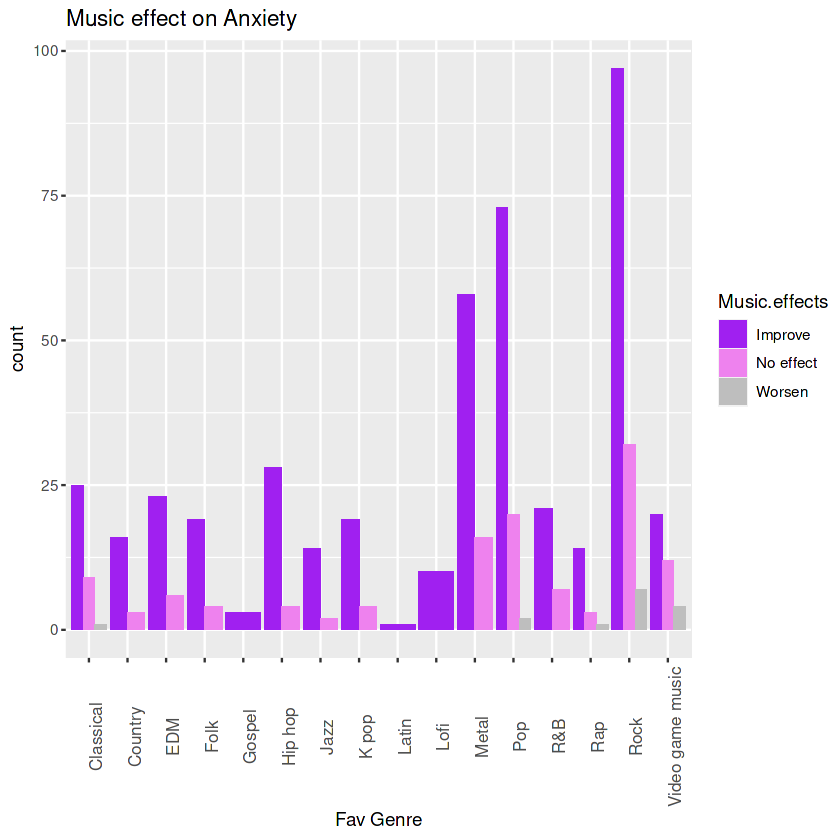

In [28]:
ggplot(an, aes(x = Fav.genre, fill = Music.effects)) + geom_bar(position="dodge") + labs(title = "Music effect on Anxiety") + xlab("Fav Genre") + theme(axis.text.x= element_text(size =10, angle = 90)) + scale_fill_manual(breaks =c("Improve","No effect","Worsen"),values=c("Purple", "violet", "grey")) 

People with Anxiety who listened to Latin, Lofi and Gospel, reported improved conditions only.

In [29]:
#Create subset for Depression

de <- subset(music_mh_v2, select = c(Fav.genre, Depression, Music.effects))%>%
filter(Music.effects != "")%>%
filter(Depression > 0)

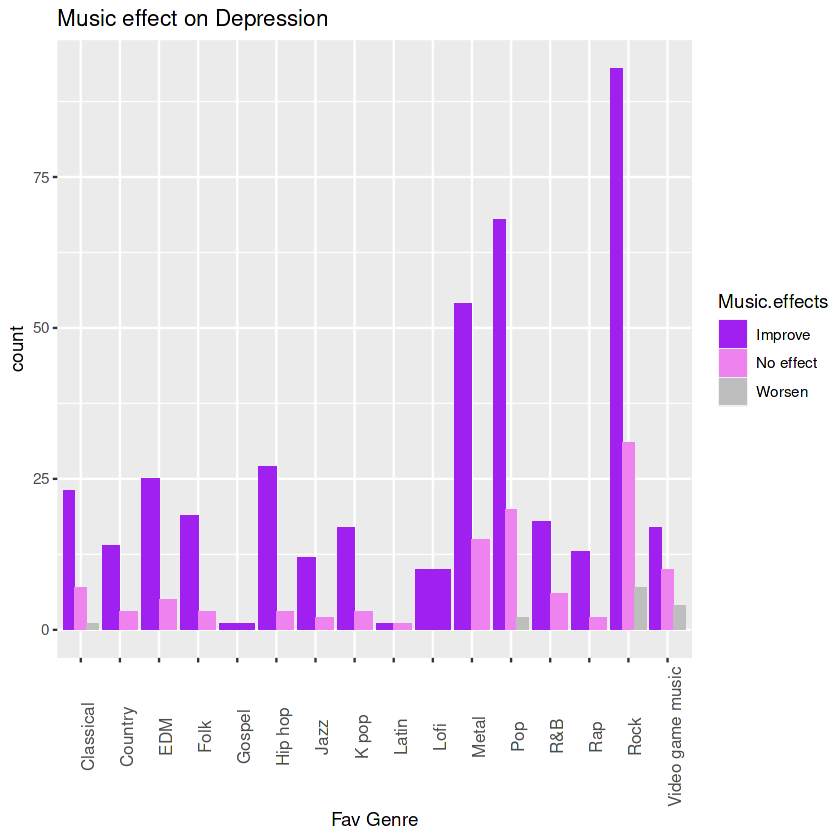

In [30]:
ggplot(de, aes(x = Fav.genre, fill = Music.effects)) + geom_bar(position="dodge") + labs(title = "Music effect on Depression") + xlab("Fav Genre") + theme(axis.text.x= element_text(size =10, angle = 90)) + scale_fill_manual(breaks =c("Improve","No effect","Worsen"),values=c("Purple", "violet", "grey")) 

People with Depression who listened to Latin and Gospel, reported improved conditions only.

In [31]:
#Create subset for Insomnia

In <- subset(music_mh_v2, select = c(Fav.genre, Insomnia, Music.effects))%>%
filter(Music.effects != "") %>%
filter(Insomnia > 0)

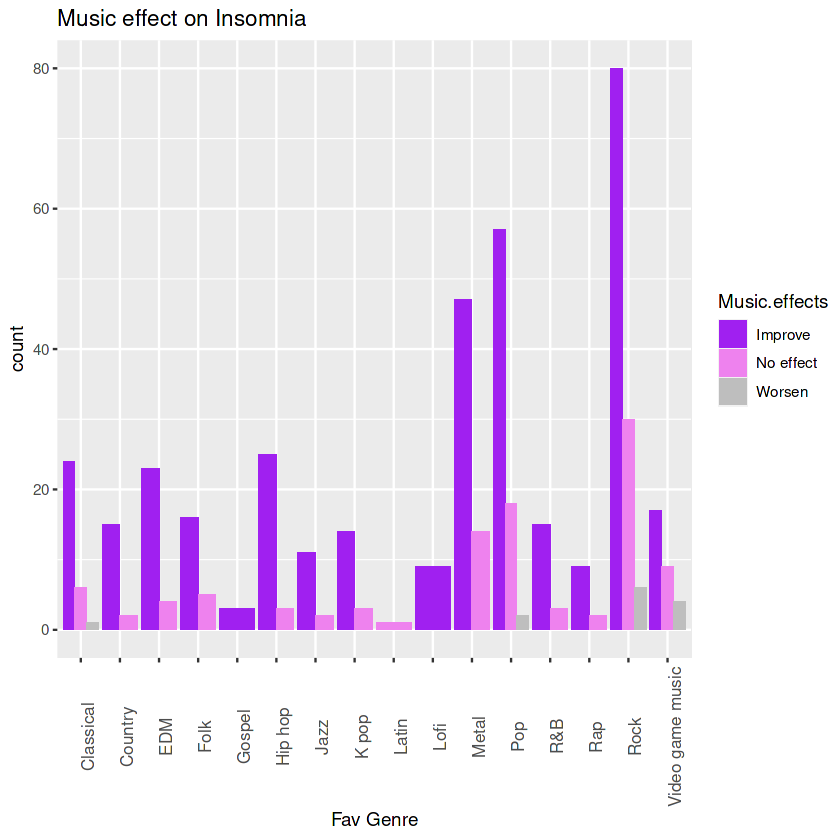

In [32]:
ggplot(In, aes(x = Fav.genre, fill = Music.effects)) + geom_bar(position="dodge") + labs(title = "Music effect on Insomnia") + xlab("Fav Genre") + theme(axis.text.x= element_text(size =10, angle = 90)) + scale_fill_manual(breaks =c("Improve","No effect","Worsen"),values=c("Purple", "violet", "grey")) 

People with Insomnia who listened to Lofi and Gospel, reported improved conditions only.

In [33]:
#Create subset for OCD

ocd <- subset(music_mh_v2, select = c(Fav.genre, OCD, Music.effects))%>%
filter(Music.effects != "") %>%
filter(OCD > 0)

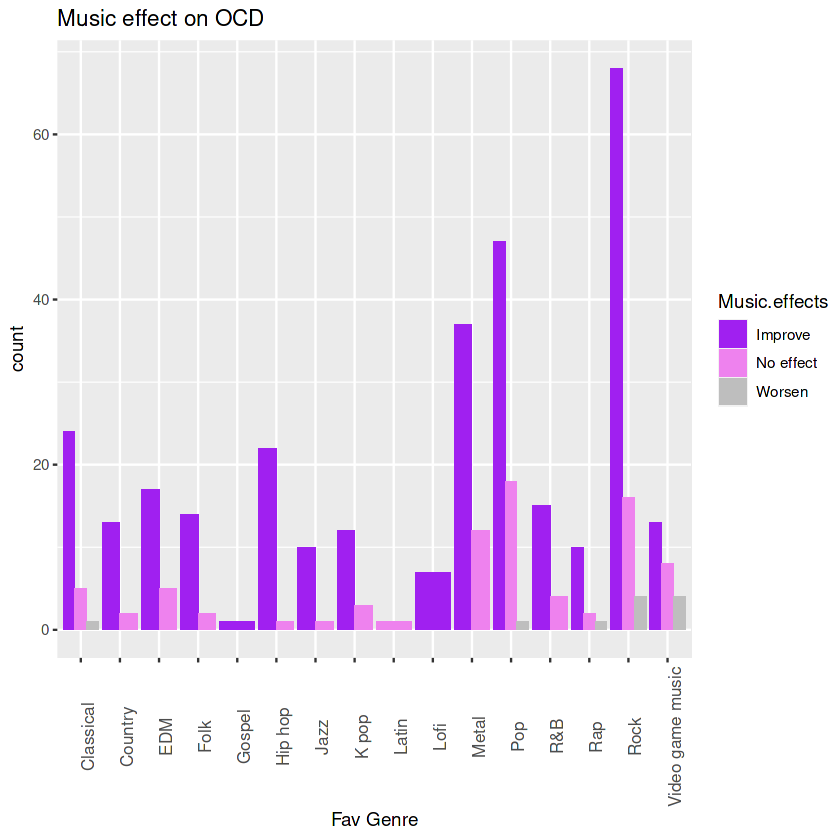

In [34]:
ggplot(ocd, aes(x = Fav.genre, fill = Music.effects)) + geom_bar(position="dodge") + labs(title = "Music effect on OCD") + xlab("Fav Genre") + theme(axis.text.x= element_text(size =10, angle = 90)) + scale_fill_manual(breaks =c("Improve","No effect","Worsen"),values=c("Purple", "violet", "grey")) 

People with OCD who listened to Lofi and Gospel, reported improved conditions only. Latin music had no effect on OCD.

**Music can be an effective tool in regulating mental health conditions. While some genres may worsen situations, others definitely improve mental health conditions.**